In [124]:
import numpy as np
import pandas as pd

from sklearn.metrics import log_loss, mean_squared_error

import matplotlib.pyplot as plt

from random import random as rand

import seaborn as sns

## useful functions, just for research

In [2]:
def hist(y, bins=50, qn=1, t = None, figsize=(5, 3)):
    y = np.array(y)
    x = y[~np.isnan(y)]
    
    if qn:
        for q in np.arange(0, 10, 1):
            print(f"{q / 10}: {round(np.quantile(x, q / 10), 3)}")
    
    plt.figure(figsize=figsize)
    
    if t != None:
        plt.title(t)
    
    plt.hist(x, bins=bins)
    
    plt.show()

# Data

In [3]:
d = pd.read_csv("data/odds_api_soccer_russia_premier_league2021-10-16.csv")

In [4]:
d.head()

,Date Updated,Time,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw
0,2021-10-16T02:46:51Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sportsbet,9.00,1.30,5.00
1,2021-10-16T02:44:36Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,bovada,8.00,1.34,5.00
2,2021-10-16T02:46:54Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,onexbet,11.00,1.35,5.35
3,2021-10-16T02:45:37Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,betclic,7.85,1.35,5.00
4,2021-10-16T02:46:53Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,paddypower,8.50,1.29,5.00


## preprocessing 

In [5]:
# converting odds to probabilities

d["ph"] = 1 / d.moneyline_home
d["pa"] = 1 / d.moneyline_away
d["pd"] = 1 / d.moneyline_draw


d["du"] = pd.to_datetime(d["Date Updated"])
d["t"] = d.Time.apply(lambda x: x.split(" Moscow Time")[0])
d.drop(["Date Updated", "Time"], axis=1, inplace=True)

d.Date = pd.to_datetime(d.Date)

d = d[list(d.columns[-2:]) + list(d.columns[:-2])]

d.sort_values("du", inplace=True)

d["m"] = d.du.values.astype('<M8[m]')

In [6]:
d.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.125000,0.751880,0.217391,2021-10-16 02:40:00
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.114943,0.769231,0.204082,2021-10-16 02:41:00
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.133333,0.740741,0.210526,2021-10-16 02:41:00
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.133333,0.757576,0.212766,2021-10-16 02:41:00
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.125000,0.740741,0.208333,2021-10-16 02:42:00


In [7]:
s = d["ph"] + d["pa"] + d["pd"]

In [8]:
d["vig"] = s - 1

0.0: 0.001
0.1: 0.025
0.2: 0.046
0.3: 0.062
0.4: 0.071
0.5: 0.073
0.6: 0.078
0.7: 0.086
0.8: 0.093
0.9: 0.101


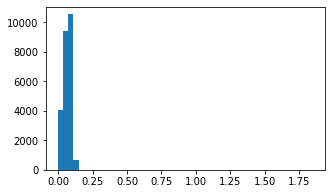

In [9]:
hist(s - 1)

# Vig analysis

In [140]:
r = d.groupby("Bookmaker").vig.mean()
r = r.sort_values()[::-1]

In [137]:
r.index

Index(['neds', 'ladbrokes', 'intertops', 'sport888', 'paddypower', 'skybet',
       'williamhill', 'playup', 'tab', 'sportsbet', 'unibet', 'sugarhouse',
       'barstool', 'twinspires', 'coral', 'betrivers', 'wynnbet', 'bovada',
       'betclic', 'mybookieag', 'gtbets', 'draftkings', 'betus', 'pinnacle',
       'matchbook', 'betfair', 'marathonbet', 'onexbet'],
      dtype='object', name='Bookmaker')

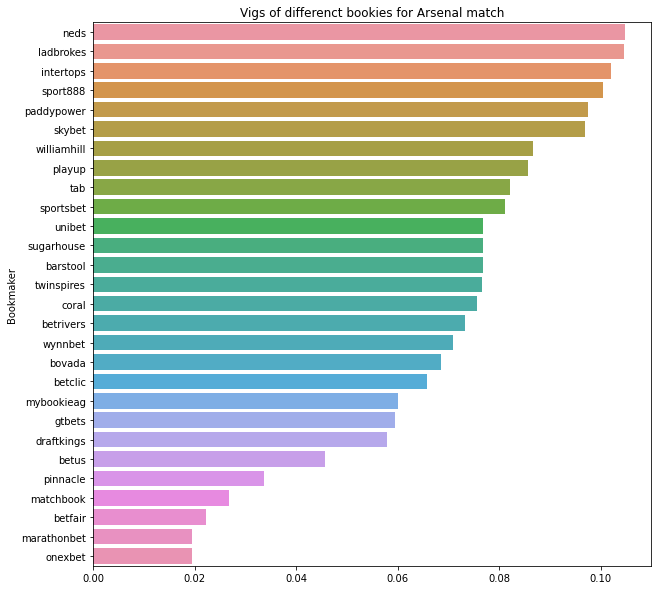

In [138]:
plt.figure(figsize=(10, 10))

plt.title("Vigs of differenct bookies for Arsenal match")
sns.barplot(x=np.array(r), y=r.index, orient='h')

plt.show()

In [14]:
bookies = np.unique(d.Bookmaker)

In [15]:
bookies

array(['barstool', 'betclic', 'betfair', 'betrivers', 'betus', 'bovada',
       'coral', 'draftkings', 'gtbets', 'intertops', 'ladbrokes',
       'marathonbet', 'matchbook', 'mybookieag', 'neds', 'onexbet',
       'paddypower', 'pinnacle', 'playup', 'skybet', 'sport888',
       'sportsbet', 'sugarhouse', 'tab', 'twinspires', 'unibet',
       'williamhill', 'wynnbet'], dtype=object)

In [16]:
b = bookies[0]

In [17]:
b

'barstool'

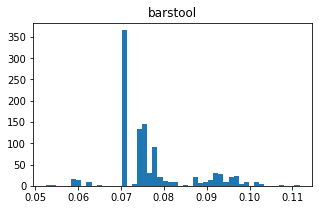

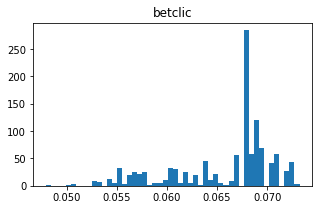

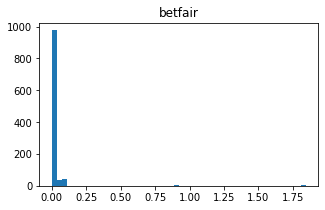

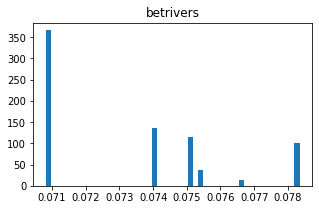

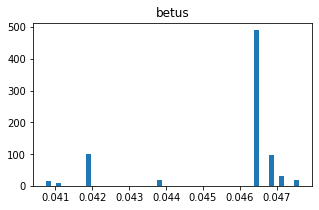

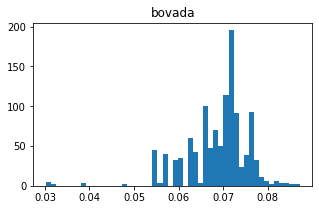

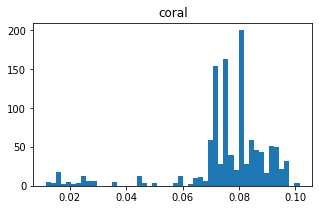

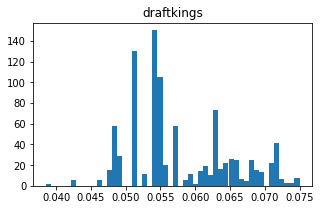

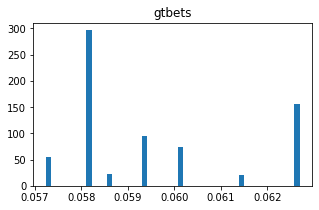

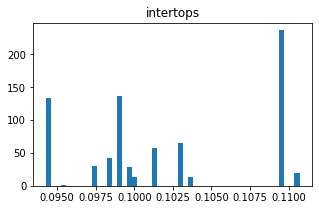

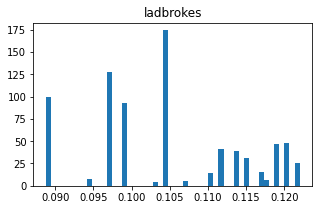

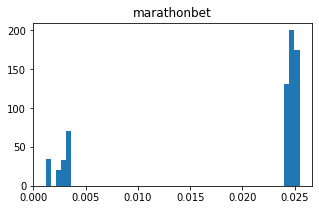

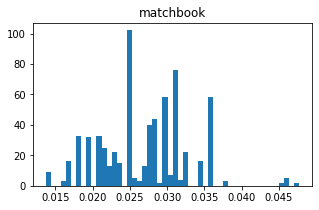

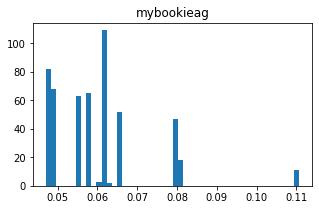

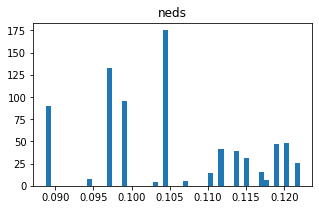

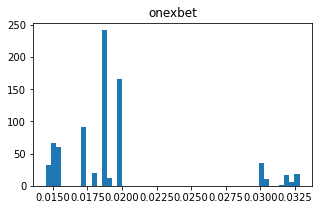

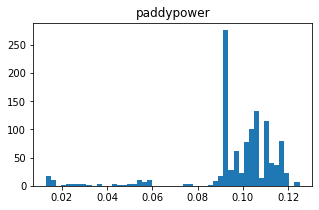

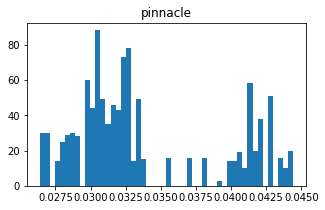

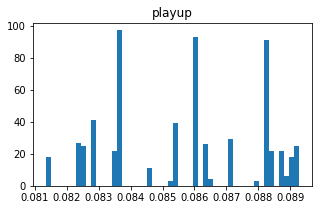

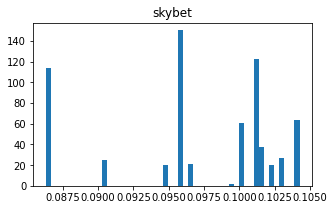

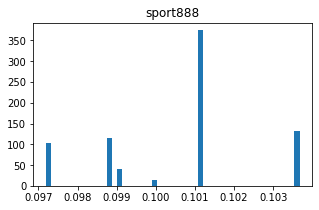

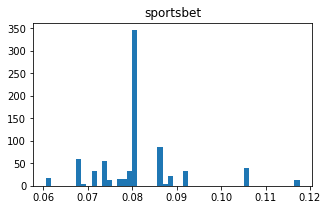

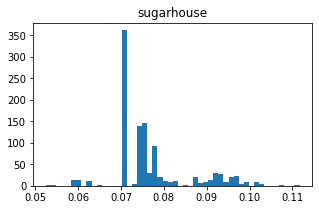

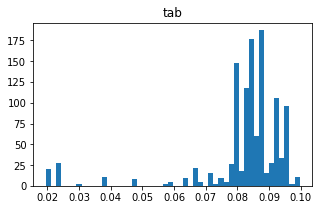

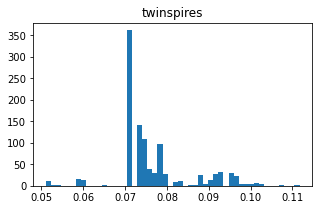

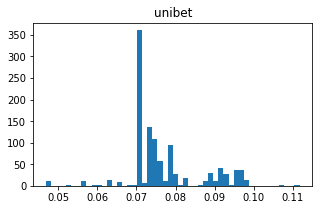

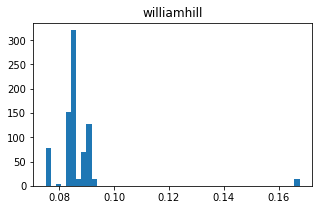

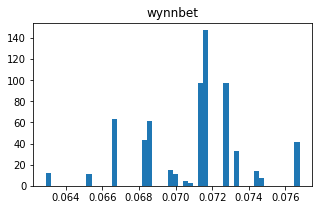

In [18]:
for b in bookies:
    hist(d[d.Bookmaker == b].vig, qn=0, t=b)

In [19]:
d["ph"] /= s
d["pa"] /= s
d["pd"] /= s

In [20]:
d["ph"] += d["pd"] / 2
d["pa"] += d["pd"] / 2

In [21]:
d.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,vig
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,0.094271
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,0.088255
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,0.084600
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,0.103675
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,0.074074


# EDA 

samples in minute

0.0: 1.0
0.1: 2.0
0.2: 2.0
0.3: 2.0
0.4: 3.0
0.5: 3.0
0.6: 3.0
0.7: 3.0
0.8: 4.0
0.9: 6.0


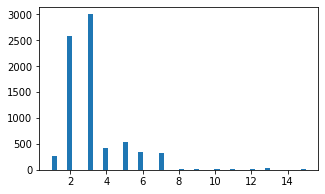

In [22]:
hist(d.groupby(["MarketName", "Bookmaker", "m"]).size())

markets

In [23]:
list(d.groupby("MarketName").groups.keys())

['Arsenal Tula/Zenit St Petersburg',
 'FK Sochi/FK Rostov',
 'Rubin Kazan/Lokomotiv Moscow',
 'Spartak Moscow/Dinamo Moscow']

bookmakers

In [24]:
np.unique(d.Bookmaker)

array(['barstool', 'betclic', 'betfair', 'betrivers', 'betus', 'bovada',
       'coral', 'draftkings', 'gtbets', 'intertops', 'ladbrokes',
       'marathonbet', 'matchbook', 'mybookieag', 'neds', 'onexbet',
       'paddypower', 'pinnacle', 'playup', 'skybet', 'sport888',
       'sportsbet', 'sugarhouse', 'tab', 'twinspires', 'unibet',
       'williamhill', 'wynnbet'], dtype=object)

# Bets for particular market, "Arsenal Tula/Zenit St Petersburg"

# Sharpness

In [25]:
a = d[d.MarketName == "Arsenal Tula/Zenit St Petersburg"].copy()

In [26]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,vig
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,0.094271
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,0.088255
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,0.084600
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,0.103675
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,0.074074


In [27]:
a["ts"] = a.du.astype(int)

In [28]:
a.tail()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,vig,ts
14857,2021-10-16 12:55:57+00:00,13:59:27,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,pinnacle,1.43,14.16,3.68,0.801768,0.198232,0.260871,2021-10-16 12:55:00,0.041661,1634388957000000000
14845,2021-10-16 12:55:57+00:00,13:58:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,pinnacle,1.43,14.16,3.68,0.801768,0.198232,0.260871,2021-10-16 12:55:00,0.041661,1634388957000000000
14947,2021-10-16 12:55:57+00:00,14:02:27,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,pinnacle,1.43,14.16,3.68,0.801768,0.198232,0.260871,2021-10-16 12:55:00,0.041661,1634388957000000000
14869,2021-10-16 12:55:57+00:00,14:00:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,pinnacle,1.43,14.16,3.68,0.801768,0.198232,0.260871,2021-10-16 12:55:00,0.041661,1634388957000000000
14821,2021-10-16 12:55:57+00:00,13:56:27,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,pinnacle,1.43,14.16,3.68,0.801768,0.198232,0.260871,2021-10-16 12:55:00,0.041661,1634388957000000000


In [111]:
def get_last_data(x):
    sz = len(x[-1])
    
    y = []
    for xi in x:
        if len(xi) == sz:
            y.append(xi)
            
    return np.array(y)


def get_bookie_data(a):
    data = a[["ts", "Bookmaker", "ph"]].to_numpy()
    
    kbooks = {}

    res = []

    for i in range(len(data)):
        ts = data[i][0]
        book = data[i][1]
        vh = data[i][2]
        
        kbooks[book] = vh
        
        bdata = list()
        for bookie, prob in kbooks.items():
            bdata.append(prob)
        
        res.append([ts] + bdata)
        
    res = get_last_data(res)
    
    bookies = list(kbooks.keys())
        
    res = pd.DataFrame(data=res, columns=(["t"] +  bookies))
    
    res["ts"] = res.t
    res.t = pd.to_datetime(res.t)
    
    res["m"] = res.t.values.astype('<M8[m]')
    res = res.groupby("m").mean().reset_index()
    
    end_time = res.iloc[-1].m - pd.Timedelta(hours=2)
    start_time = end_time - pd.Timedelta(hours=5)
     
    res = res[(start_time < res.m) & (res.m < end_time)]
    
    return res

In [157]:
def find_sharpness(a):
    z = get_bookie_data(a)

    res = z.drop(["m", "ts"], axis=1)
    
    vigs = np.array(a.groupby("Bookmaker").vig.mean().reset_index())

    v = {}

    for vig in vigs:
        v[vig[0]] = vig[1]

    result = []
    for c in res.columns:
        sz = len(res[c])
        result.append([c, mean_squared_error(np.full(sz, income), res[c], squared=False), v[c]])

    result = pd.DataFrame(data=result, columns=["b", "mean_squared", "vig"])
    
    return result.sort_values("mean_squared")

In [176]:
def find_sharpness(a):
    z = get_bookie_data(a)

    res = z.drop(["m", "ts"], axis=1)
    
    vigs = np.array(a.groupby("Bookmaker").vig.mean().reset_index())

    v = {}

    for vig in vigs:
        v[vig[0]] = vig[1]

    result = []
    for c in res.columns:
        sz = len(res[c])
        result.append([c, np.log(np.full(sz, income) - res[c]).mean(), v[c]])

    result = pd.DataFrame(data=result, columns=["b", "log_loss", "vig"])
    
    return result.sort_values("log_loss")

In [177]:
z = find_sharpness(a)

In [178]:
z

,b,log_loss,vig
12,betclic,-0.226136,0.066818
7,bovada,-0.226071,0.070186
2,tab,-0.225649,0.084111
15,betus,-0.225332,0.046446
21,neds,-0.223357,0.098439
5,ladbrokes,-0.223285,0.098252
0,intertops,-0.222651,0.102591
13,wynnbet,-0.218996,0.071814
3,sport888,-0.218004,0.101792
23,paddypower,-0.217059,0.100133


# Vis

In [32]:
data = a[["ts", "Bookmaker", "ph", "pa"]].to_numpy()

def calculate_average_bookies(col=2):
    kbooks = {}

    res = []

    last_ts = -1
    csum = 0.0

    for i in range(len(data)):
        ts = data[i][0]
        book = data[i][1]
        v = data[i][col]

        if book in kbooks:
            csum -= kbooks[book]

        kbooks[book] = v
        csum += v
        
        res.append(csum / len(kbooks))
        
    return np.array(res)

In [33]:
mh = calculate_average_bookies(2)
ma = calculate_average_bookies(3)

a["havg"] = mh
a["aavg"] = ma

In [34]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,vig,ts,havg,aavg
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,0.094271,1634352036000000000,0.213563,0.786437
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,0.088255,1634352075000000000,0.206475,0.793525
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,0.084600,1634352075000000000,0.210978,0.789022
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,0.103675,1634352077000000000,0.212533,0.787467
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,0.074074,1634352172000000000,0.212699,0.787301


0.0: 1.0
0.1: 1.0
0.2: 1.0
0.3: 1.0
0.4: 1.0
0.5: 1.0
0.6: 1.0
0.7: 1.0
0.8: 1.0
0.9: 1.0


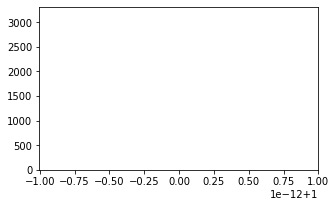

In [35]:
hist(a.havg + a.aavg)

In [39]:
def time_ind(x):
    return (start_time < x.du) & (x.du < end_time)

In [43]:
bookmakers = np.unique(a.Bookmaker)

In [49]:
r

Bookmaker
neds           0.104720
ladbrokes      0.104599
intertops      0.102149
sport888       0.100576
paddypower     0.097521
skybet         0.096953
williamhill    0.086742
playup         0.085679
tab            0.082061
sportsbet      0.081217
unibet         0.076901
sugarhouse     0.076858
barstool       0.076848
twinspires     0.076725
coral          0.075568
betrivers      0.073357
wynnbet        0.070904
bovada         0.068626
betclic        0.065785
mybookieag     0.060043
gtbets         0.059551
draftkings     0.057915
betus          0.045712
pinnacle       0.033758
matchbook      0.026820
betfair        0.022338
marathonbet    0.019537
onexbet        0.019438
Name: vig, dtype: float64

In [53]:
len(r.index)

28

In [61]:
bookmakers = list(r.index[14:]) + ["pinnacle"]

In [64]:
bookmakers = list(r.index)

In [55]:
of1 = 6
of2 = 5

start_time = a.iloc[0].du + pd.Timedelta(hours=of1)
end_time = a.iloc[0].du + pd.Timedelta(hours=(of1 + of2))

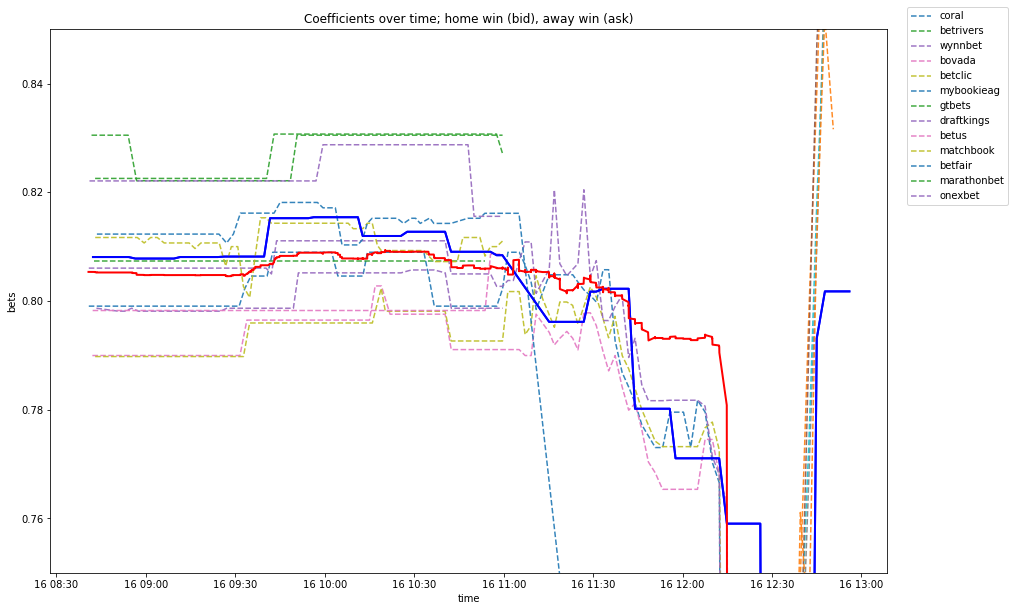

In [115]:
plt.figure(figsize=(15, 10))

plt.title("Coefficients over time; home win (bid), away win (ask)")
plt.ylabel("bets")
plt.xlabel("time")

alpha = 0.9
w1 = 1.5
w2 = 2

for bookmaker in bookmakers:
    c = a[a.Bookmaker == bookmaker]

    ind = time_ind(c)

    if bookmaker != "pinnacle":
        plt.plot(c.du[ind], c.pa[ind], linestyle="dashed", alpha=alpha, label=bookmaker, linewidth=w1)
        plt.plot(c.du[ind], c.ph[ind], linestyle="dashed", alpha=alpha, linewidth=w1)
    else:
        plt.plot(c.du[ind], c.pa[ind], c="b", linewidth=w2)
        plt.plot(c.du[ind], c.ph[ind], c="b", linewidth=w2)


ind = time_ind(a)
plt.plot(a.du[ind], a.aavg[ind], c="r", linewidth=w2)
plt.plot(a.du[ind], a.havg[ind], c="g", linewidth=w2)

plt.legend(bbox_to_anchor=(1.15, 1.05))

plt.ylim([0.75, 0.85])

plt.show()

bets for whole period

No handles with labels found to put in legend.


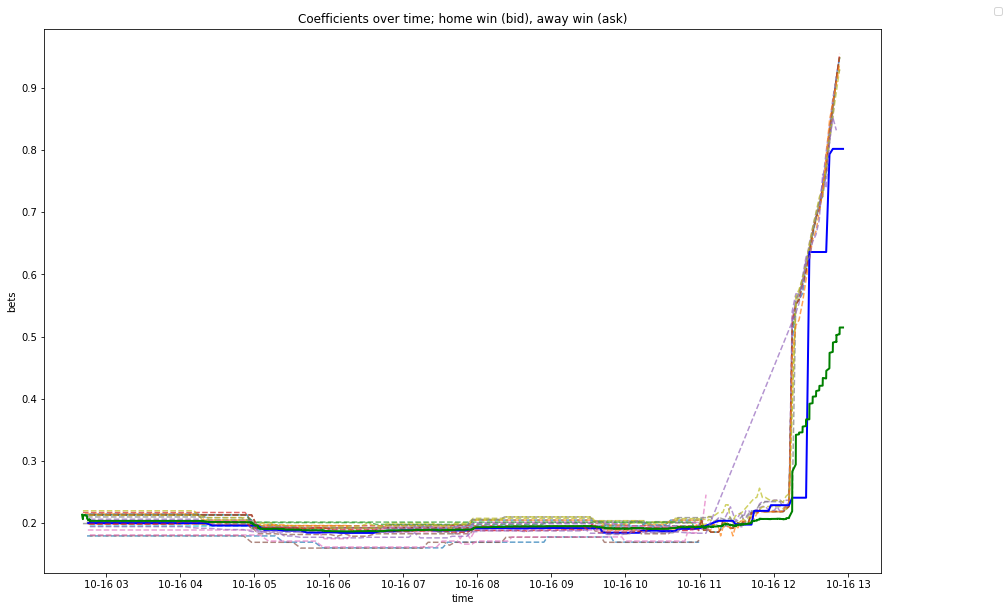

In [66]:
%matplotlib inline

plt.figure(figsize=(15, 10))

plt.title("Coefficients over time; home win (bid), away win (ask)")
plt.ylabel("bets")
plt.xlabel("time")

alpha = 0.7
w = 2

for bookmaker in bookmakers:
    c = a[a.Bookmaker == bookmaker]

    ind = time_ind(c)

    if bookmaker != "pinnacle":
#         plt.plot(c.du, c.pa, linestyle="dashed", alpha=alpha, label=bookmaker)
        plt.plot(c.du, c.ph, linestyle="dashed", alpha=alpha)
    else:
#         plt.plot(c.du, c.pa, c="b", linewidth=w)
        plt.plot(c.du, c.ph, c="b", linewidth=w)

        
# plt.plot(a.du, a.aavg, c="r", linewidth=w)
plt.plot(a.du, a.havg, c="g", linewidth=w)

plt.legend(bbox_to_anchor=(1.15, 1.05))

# plt.ylim([0.75, 0.85])

plt.show()

In [69]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,vig,ts,havg,aavg
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,0.094271,1634352036000000000,0.213563,0.786437
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,0.088255,1634352075000000000,0.206475,0.793525
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,0.084600,1634352075000000000,0.210978,0.789022
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,0.103675,1634352077000000000,0.212533,0.787467
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,0.074074,1634352172000000000,0.212699,0.787301


In [90]:
a.to_csv("Arsenal_game.csv", index=False)

# Political arena vigs

In [3]:
d = pd.read_csv("data/odds_api_soccer_russia_premier_league2021-10-16.csv")

In [4]:
d.head()

,Date Updated,Time,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw
0,2021-10-16T02:46:51Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sportsbet,9.00,1.30,5.00
1,2021-10-16T02:44:36Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,bovada,8.00,1.34,5.00
2,2021-10-16T02:46:54Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,onexbet,11.00,1.35,5.35
3,2021-10-16T02:45:37Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,betclic,7.85,1.35,5.00
4,2021-10-16T02:46:53Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,paddypower,8.50,1.29,5.00
